In [8]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [9]:
def wrangle(filepath):
     # Read CSV file into Dataframe
    df = pd.read_csv(filepath)
    # Drop features with high null counts
    df.drop(columns=["referredby"], axis = 1, inplace=True)
    #df["total_female"].fillna( method ='ffill', inplace = True)
    #df["total_male"].fillna( method ='ffill', inplace = True)
    # Remove NAN Value
    #df.dropna(inplace=True)
    return df

In [28]:
df_train = wrangle(r'C:\Users\sanus\Desktop\PERPAFOR\niger23\trainperf.csv')
 # replace values based on condition
#df_train['good_bad_flag'] = df_train['good_bad_flag'].astype(float)
df_train['good_bad_flag'][df_train['good_bad_flag']=='Good'] = 1
df_train['good_bad_flag'][df_train['good_bad_flag']=='Bad'] = 0
#df_train["good_bad_flag"] = pd.to_numeric(df_train["good_bad_flag"], errors='coerce')
df_test  = wrangle(r'C:\Users\sanus\Desktop\PERPAFOR\niger23\testperf.csv')
print(df_train.info(), df_train.shape, df_test.info(), df_test.shape)
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 307.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 n

C:\Users\sanus\AppData\Local\Temp\ipykernel_10856\1753156533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['good_bad_flag'][df_train['good_bad_flag']=='Good'] = 1
C:\Users\sanus\AppData\Local\Temp\ipykernel_10856\1753156533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['good_bad_flag'][df_train['good_bad_flag']=='Bad'] = 0


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,1


In [29]:
df_test.isnull().sum()

customerid      0
systemloanid    0
loannumber      0
approveddate    0
creationdate    0
loanamount      0
totaldue        0
termdays        0
dtype: int64

In [30]:
df_train.isnull().sum()

customerid       0
systemloanid     0
loannumber       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
good_bad_flag    0
dtype: int64

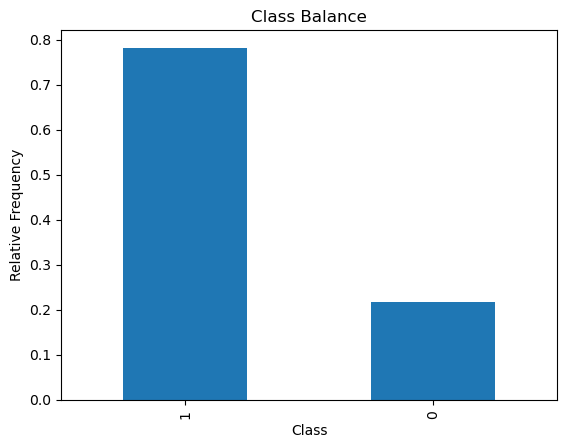

In [31]:
# Plot value counts of `"severe_damage"`
df_train["good_bad_flag"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

In [37]:
target = "good_bad_flag"
X = df_train.drop(columns=target)
y = df_train[target].astype('int')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3494, 8)
y_train shape: (3494,)
X_test shape: (874, 8)
y_test shape: (874,)


In [39]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.79


In [40]:
# Build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=4000)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['customerid', 'approveddate',
                                     'creationdate'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=4000))])

In [41]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.79
Test Accuracy: 0.76


In [42]:
model.predict(X_train)

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
features = model.named_steps["onehotencoder"].get_feature_names() 
importances = model.named_steps["logisticregression"].coef_[0]

In [44]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

customerid_8a858e675c3fe0a1015c5315aaae176a    1.0
approveddate_2017-07-05 12:42:06.000000        1.0
approveddate_2017-07-20 11:44:13.000000        1.0
approveddate_2017-07-16 13:08:18.000000        1.0
approveddate_2017-07-21 14:13:18.000000        1.0
dtype: float64

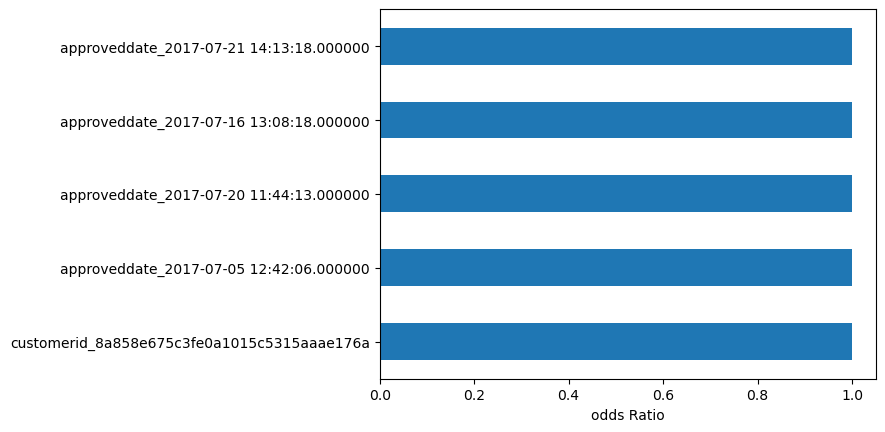

In [46]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh")
plt.xlabel("odds Ratio");

In [47]:
#model makes a prediction
preds = model.predict(df_test)
# Convert it to a dataframe
preds = pd.DataFrame(preds)
#get a sample of the preds dataframe
preds.head()

,0
0,1
1,1
2,1
3,1
4,1


In [48]:
# Check for missing values
preds.isnull().sum()

0    0
dtype: int64

In [49]:
# Here we are converting the submission data to a dataframe
submission = pd.DataFrame({
        "customerid": df_test["customerid"],
        "good_bad_flag": preds[0]
    })

In [51]:
#here we are converting to a csv file
submission.to_csv('MY_submission123.csv', index=False)

In [55]:
submission.head()

,customerid,good_bad_flag
0,8a858899538ddb8e015390510b321f08,1
1,8a858959537a097401537a4e316e25f7,1
2,8a8589c253ace09b0153af6ba58f1f31,1
3,8a858e095aae82b7015aae86ca1e030b,1
4,8a858e225a28c713015a30db5c48383d,1
